# COVID-19 Data Exploration

Data collected from:

https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

(c) AJEsteves, April 2020 

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
!curl https://opendata.ecdc.europa.eu/covid19/casedistribution/csv/ > covid19_opendata_ecdc_europa.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  726k  100  726k    0     0   690k      0  0:00:01  0:00:01 --:--:--  691k


In [3]:
covdf = pd.read_csv('covid19_opendata_ecdc_europa.csv')

In [4]:
covdf.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,24/04/2020,24,4,2020,105,2,Afghanistan,AF,AFG,37172386.0,Asia
1,23/04/2020,23,4,2020,84,4,Afghanistan,AF,AFG,37172386.0,Asia
2,22/04/2020,22,4,2020,61,1,Afghanistan,AF,AFG,37172386.0,Asia
3,21/04/2020,21,4,2020,35,2,Afghanistan,AF,AFG,37172386.0,Asia
4,20/04/2020,20,4,2020,88,3,Afghanistan,AF,AFG,37172386.0,Asia


In [5]:
covdf.tail()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
12796,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
12797,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0,Africa
12798,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
12799,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
12800,21/03/2020,21,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa


In [6]:
covdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12801 entries, 0 to 12800
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dateRep                  12801 non-null  object 
 1   day                      12801 non-null  int64  
 2   month                    12801 non-null  int64  
 3   year                     12801 non-null  int64  
 4   cases                    12801 non-null  int64  
 5   deaths                   12801 non-null  int64  
 6   countriesAndTerritories  12801 non-null  object 
 7   geoId                    12760 non-null  object 
 8   countryterritoryCode     12664 non-null  object 
 9   popData2018              12694 non-null  float64
 10  continentExp             12801 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 1.1+ MB


In [7]:
covdf.describe()

,day,month,year,cases,deaths,popData2018
count,12801.000000,12801.000000,12801.000000,12801.000000,12801.000000,1.269400e+04
mean,15.787595,2.952816,2019.994766,208.431763,14.861026,5.716106e+07
std,8.468072,1.266747,0.072159,1488.808879,118.515802,1.876496e+08
min,1.000000,1.000000,2019.000000,-9.000000,0.000000,1.000000e+03
25%,9.000000,2.000000,2020.000000,0.000000,0.000000,2.866376e+06
50%,16.000000,3.000000,2020.000000,1.000000,0.000000,9.956011e+06
75%,23.000000,4.000000,2020.000000,25.000000,0.000000,3.797855e+07
max,31.000000,12.000000,2020.000000,37289.000000,4928.000000,1.392730e+09


In [8]:
covdf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
day,12801.0,1.578759e+01,8.468072e+00,1.0,9.0,16.0,23.0,3.100000e+01
month,12801.0,2.952816e+00,1.266747e+00,1.0,2.0,3.0,4.0,1.200000e+01
year,12801.0,2.019995e+03,7.215940e-02,2019.0,2020.0,2020.0,2020.0,2.020000e+03
cases,12801.0,2.084318e+02,1.488809e+03,-9.0,0.0,1.0,25.0,3.728900e+04
deaths,12801.0,1.486103e+01,1.185158e+02,0.0,0.0,0.0,0.0,4.928000e+03
popData2018,12694.0,5.716106e+07,1.876496e+08,1000.0,2866376.0,9956011.0,37978548.0,1.392730e+09


In [9]:
print(f"MEAN:     {covdf['cases'].mean():.2f}")
print(f"STD DEV:  {covdf['cases'].std():.2f}")
print(f"VARIANCE: {covdf['cases'].var():.2f}")
print(f"MINIMUM:  {covdf['cases'].min():.2f}")
print(f"MAXIMUM:  {covdf['cases'].max():.2f}")

MEAN:     208.43
STD DEV:  1488.81
VARIANCE: 2216551.88
MINIMUM:  -9.00
MAXIMUM:  37289.00


### Select the most relevant columns

In [10]:
covdf1 = covdf[['dateRep', 'cases', 'deaths', 'countriesAndTerritories', 'popData2018']]
covdf1.head()

,dateRep,cases,deaths,countriesAndTerritories,popData2018
0,24/04/2020,105,2,Afghanistan,37172386.0
1,23/04/2020,84,4,Afghanistan,37172386.0
2,22/04/2020,61,1,Afghanistan,37172386.0
3,21/04/2020,35,2,Afghanistan,37172386.0
4,20/04/2020,88,3,Afghanistan,37172386.0


### Filter rows for Portugal

In [11]:
pt_covdf = covdf1[covdf1['countriesAndTerritories']=='Portugal']
pt_covdf.head()

,dateRep,cases,deaths,countriesAndTerritories,popData2018
9593,24/04/2020,371,35,Portugal,10281762.0
9594,23/04/2020,603,23,Portugal,10281762.0
9595,22/04/2020,516,27,Portugal,10281762.0
9596,21/04/2020,657,21,Portugal,10281762.0
9597,20/04/2020,521,27,Portugal,10281762.0


In [12]:
pt_covdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 9593 to 9645
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dateRep                  53 non-null     object 
 1   cases                    53 non-null     int64  
 2   deaths                   53 non-null     int64  
 3   countriesAndTerritories  53 non-null     object 
 4   popData2018              53 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.5+ KB


In [13]:
pt_covdf1 = pt_covdf.reset_index()

pt_covdf1.head()

,index,dateRep,cases,deaths,countriesAndTerritories,popData2018
0,9593,24/04/2020,371,35,Portugal,10281762.0
1,9594,23/04/2020,603,23,Portugal,10281762.0
2,9595,22/04/2020,516,27,Portugal,10281762.0
3,9596,21/04/2020,657,21,Portugal,10281762.0
4,9597,20/04/2020,521,27,Portugal,10281762.0


In [14]:
pt_covdf1A = pt_covdf.iloc[[2,4]]

pt_covdf1A.head()

,dateRep,cases,deaths,countriesAndTerritories,popData2018
9595,22/04/2020,516,27,Portugal,10281762.0
9597,20/04/2020,521,27,Portugal,10281762.0


In [15]:
pt_covdf2 = pt_covdf1.drop(['index','countriesAndTerritories','popData2018'],axis=1)

pt_covdf2.head()

,dateRep,cases,deaths
0,24/04/2020,371,35
1,23/04/2020,603,23
2,22/04/2020,516,27
3,21/04/2020,657,21
4,20/04/2020,521,27


### Sort data by ascending value of "dateRep" column

In [16]:
pt_covdf2['dateRep'] = pd.to_datetime(pt_covdf2.dateRep,dayfirst=True)

pt_covdf2.head()

,dateRep,cases,deaths
0,2020-04-24,371,35
1,2020-04-23,603,23
2,2020-04-22,516,27
3,2020-04-21,657,21
4,2020-04-20,521,27


In [18]:
pt_covdf3 = pt_covdf2.sort_values(by=['dateRep'], axis=0, ascending=True)

pt_covdf3.head()

,dateRep,cases,deaths
52,2020-03-03,2,0
51,2020-03-04,2,0
50,2020-03-05,1,0
49,2020-03-06,4,0
48,2020-03-07,4,0


In [30]:
pt_covdf3 = pt_covdf3.reset_index()
pt_covdf3 = pt_covdf3.drop(['index'],axis=1)

pt_covdf3.head()

,dateRep,cases,deaths,accum_cases,accum_deaths
0,2020-03-03,2,0,2,0
1,2020-03-04,2,0,4,0
2,2020-03-05,1,0,5,0
3,2020-03-06,4,0,9,0
4,2020-03-07,4,0,13,0


### Compute accumulated sum of `cases` and `deaths`

In [28]:
pt_covdf3['accum_cases']  = pt_covdf3['cases'].cumsum()
pt_covdf3['accum_deaths'] = pt_covdf3['deaths'].cumsum()

pt_covdf3.tail()

,index,dateRep,cases,deaths,accum_cases,accum_deaths
48,4,2020-04-20,521,27,20206,714
49,3,2020-04-21,657,21,20863,735
50,2,2020-04-22,516,27,21379,762
51,1,2020-04-23,603,23,21982,785
52,0,2020-04-24,371,35,22353,820


## Plot data

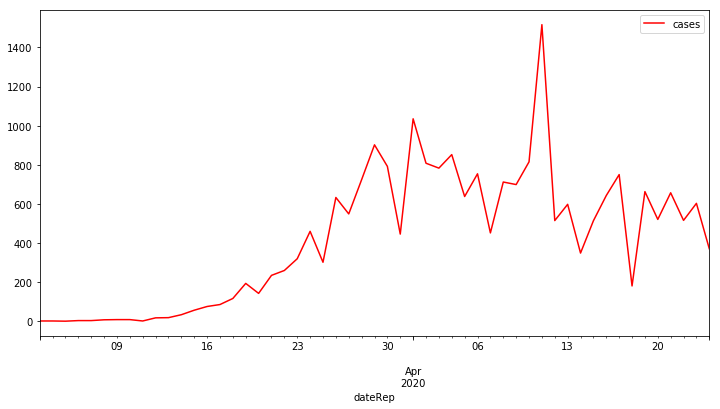

In [26]:
ax = plt.gca()

pt_covdf3.plot(kind='line',x='dateRep',y='cases', figsize=(12,6), color='red', ax=ax)
plt.show()

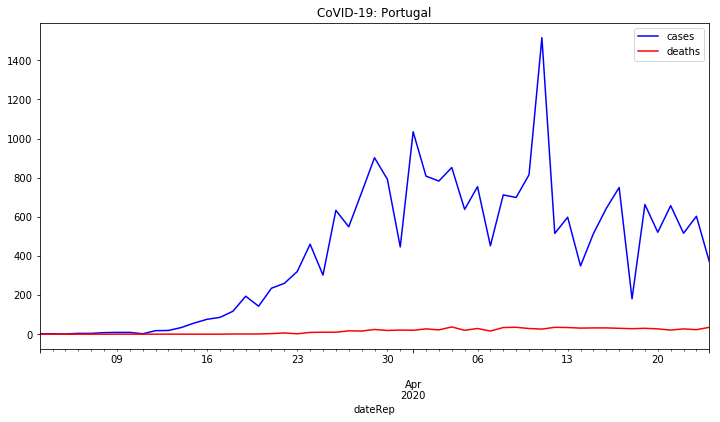

In [21]:
ax = plt.gca()

pt_covdf3.plot(kind='line',x='dateRep',y='cases',figsize=(12,6),color='blue', ax=ax)
# plt.ylabel('New Cases')

pt_covdf3.plot(kind='line',x='dateRep',y='deaths',figsize=(12,6),color='red', ax=ax)
plt.title('CoVID-19: Portugal')
#plt.ylabel('Deaths')

plt.show()

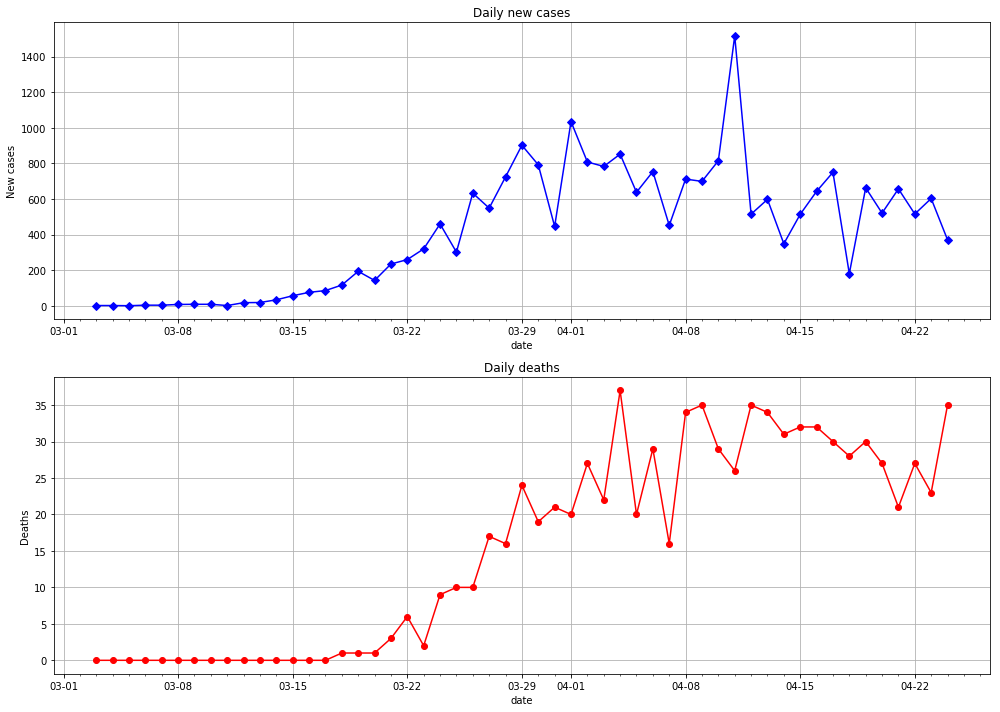

In [22]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

fig, axs = plt.subplots(2, 1, figsize=(14, 10))

# Define the date format
date_form = DateFormatter("%m-%d")

axs[0].plot(pt_covdf3['dateRep'], pt_covdf3['cases'], 'bD-')
axs[0].set_xlabel('date')
axs[0].set_ylabel('New cases')
axs[0].grid(True)
axs[0].xaxis.set_major_formatter(date_form)
axs[0].xaxis.set_minor_locator(mdates.DayLocator())
axs[0].set_title('Daily new cases')

axs[1].plot(pt_covdf3['dateRep'], pt_covdf3['deaths'], "ro-")
axs[1].set_xlabel('date')
axs[1].set_ylabel('Deaths')
axs[1].grid(True)
axs[1].xaxis.set_major_formatter(date_form)
axs[1].xaxis.set_minor_locator(mdates.DayLocator())
axs[1].set_title('Daily deaths')

fig.tight_layout()
plt.show()

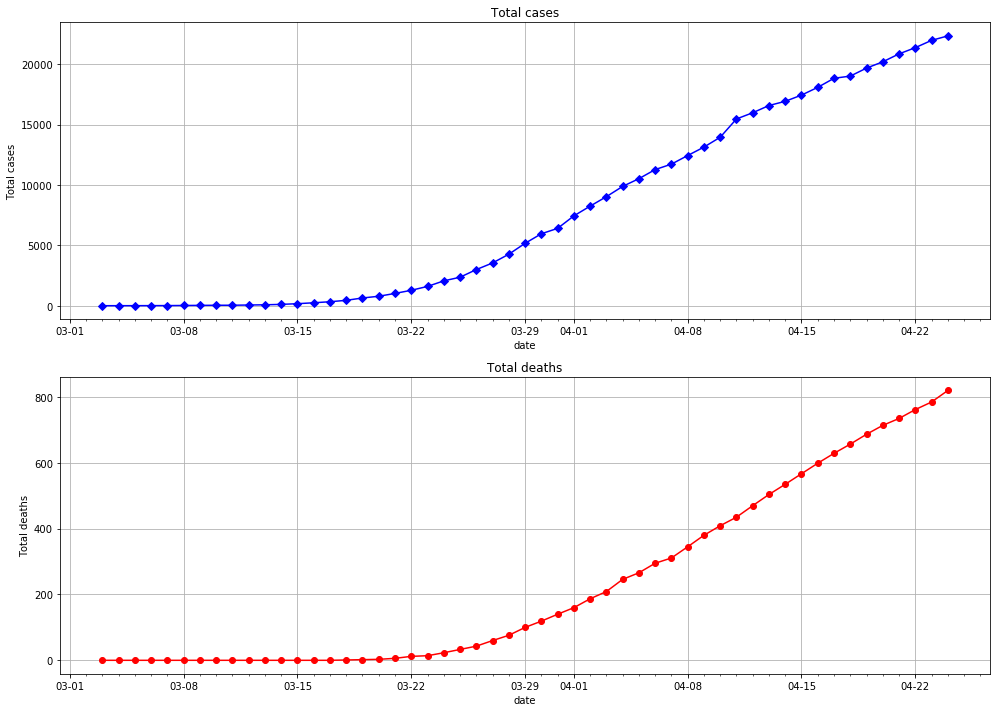

In [23]:
import matplotlib.dates as mdates
from   matplotlib.dates import DateFormatter

fig, axs = plt.subplots(2, 1, figsize=(14, 10))

# Define the date format
date_form = DateFormatter("%m-%d")

axs[0].plot(pt_covdf3['dateRep'], pt_covdf3['accum_cases'], 'bD-')
axs[0].set_xlabel('date')
axs[0].set_ylabel('Total cases')
axs[0].grid(True)
axs[0].xaxis.set_major_formatter(date_form)
axs[0].xaxis.set_minor_locator(mdates.DayLocator())
axs[0].set_title('Total cases')

axs[1].plot(pt_covdf3['dateRep'], pt_covdf3['accum_deaths'], "ro-")
axs[1].set_xlabel('date')
axs[1].set_ylabel('Total deaths')
axs[1].grid(True)
axs[1].xaxis.set_major_formatter(date_form)
axs[1].xaxis.set_minor_locator(mdates.DayLocator())
axs[1].set_title('Total deaths')

fig.tight_layout()
plt.show()